In [9]:
!pip install PyPDF2 spacy pdf2image pytesseract ipfshttpclient
!apt-get install poppler-utils  # Required for pdf2image to work
!python -m spacy download en_core_web_sm

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 16.3 MB/s eta 0:00:00
  Created wheel for varint: filename=varint-1.0.2-py3-none-any.whl size=1960 sha256=de8456abdde5e38417e5a03dfd3dbcf4bd0ba395161b9bd45291e951234b5080
  Stored in directory: /root/.cache/pip/wheels/39/48/5e/33919c52a2a695a512ca394a5308dd12626a40bbcd288de814
Successfully built varint
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched

In [51]:
!pip install PyMuPDF


In [52]:
!pip install pdfplumber

In [58]:
import pdfplumber

# Path to your PDF file
pdf_file = '/content/drive/My Drive/report1.pdf'

# Initialize an empty list to hold rows of extracted data
rows = []

# Open the PDF and extract data
with pdfplumber.open(pdf_file) as pdf:
    for page_num, page in enumerate(pdf.pages):
        # Extract text from the page
        text = page.extract_text()

        # If text exists, add it to the rows list
        if text:
            # Split the text into lines and treat each line as a row
            lines = text.split('\n')
            for line in lines:
                rows.append(f"Page {page_num + 1}: {line}")

        # Extract tables (if any)
        table = page.extract_table()
        if table:
            for row in table:
                rows.append(f"Page {page_num + 1} (Table): " + ", ".join([str(cell) if cell else "" for cell in row]))

# Print the extracted data in a text format
for row in rows:
   print(row)

print(rows)


Page 1: O ATHONOVA DIAGNOSTIC
Page 1: VA CENTRE
Page 1: +9198301 54583
Page 1: 199 WB GOVT. REGISTERED | ISO 9001:2015 CERTIFIED ) +91 79806 94205
Page 1: AS OLUTION FORHEALTHY LIFE pathonovadiagnostic@grnail.corm
Page 1: Associate Name
Page 1: SUB/18 Received On: 13/07/2024
Page 1: Clini1cP rolpdc
Page 1: Patient's Name of
Page 1: MR SHUKRADITYA BOSE Reported On: 13/07/2024 1
Page 1: Page
Page 1: ID Number
Page 1: PDC/2029/G-331/23 Age/Sex : 20Y /MALE
Page 1: Referred By
Page 1: DR ABHIJIT KARMAKAR Sample Source : 0.S.S.
Page 1: DEPARTMENT OF HAEMATOLOGY
Page 1: Test Description Biological Ref. Range
Page 1: Result Unit
Page 1: Hb(Haemoglobin) gm/dl M:13-18, F:11-16, Infant:14-20
Page 1: 15.0
Page 1: TC (Total Count)
Page 1: Erythrocytes 5.3 millions / cu.mm 4.5-5.5
Page 1: Leukocytes 8700 Cell/c.mm 4000-11000
Page 1: DC (Differential Count)
Page 1: Neutrophils 62 % 40-75
Page 1: Lymphocytes 34 20-45
Page 1: Monocytes 02 % 1-6
Page 1: Eosinophils 02 1-8
Page 1: Basophils 00 % 0-1
Page

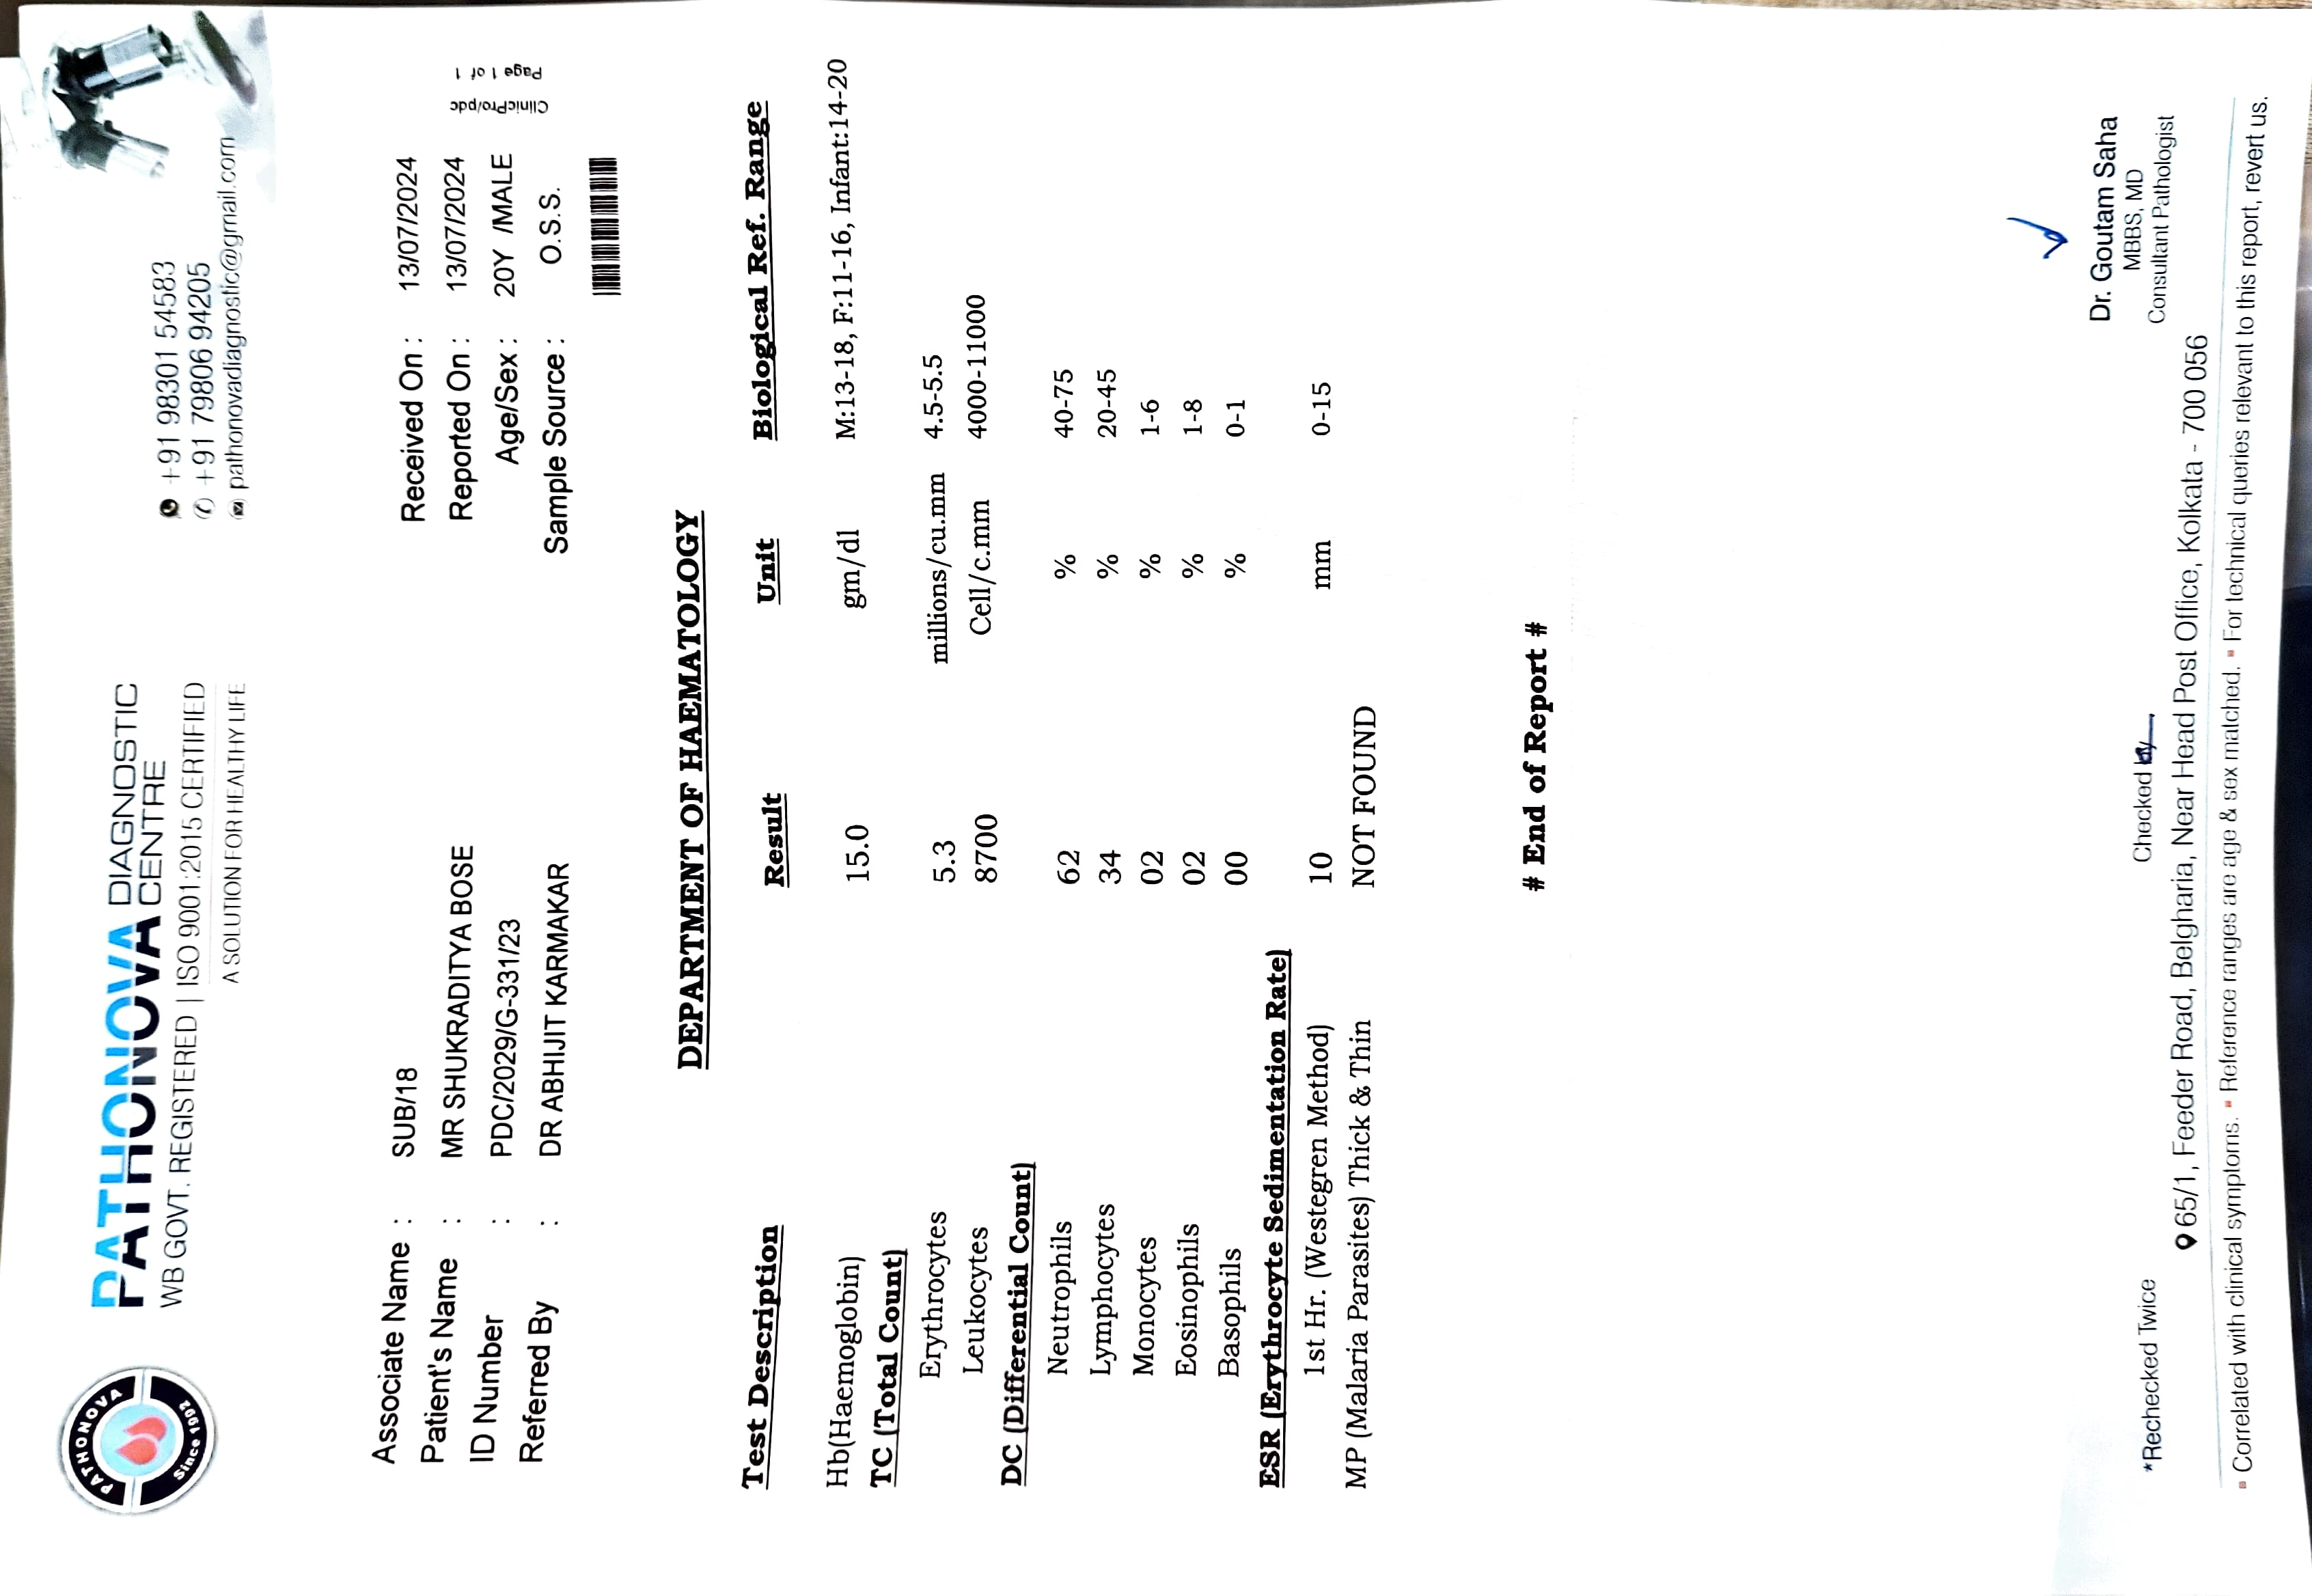

In [31]:
import fitz  # PyMuPDF
import io
from PIL import Image
import IPython.display as display

# Path to your PDF file
pdf_file = '/content/drive/My Drive/report1.pdf'

# Open the PDF file
doc = fitz.open(pdf_file)

# Loop through each page in the PDF
for page_num in range(len(doc)):
    page = doc[page_num]
    images = page.get_images(full=True)

    # Loop through images on the page
    for img_index, img in enumerate(images):
        xref = img[0]
        base_image = doc.extract_image(xref)
        image_bytes = base_image["image"]

        # Open the image with PIL
        image = Image.open(io.BytesIO(image_bytes))

        # Display the image
        display.display(image)

# Close the document
doc.close()


In [41]:
from transformers import pipeline, AutoTokenizer

# Load pre-trained tokenizer with clean_up_tokenization_spaces set to True
tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-large-cased-finetuned-conll03-english", clean_up_tokenization_spaces=True)

# Load pre-trained NER model with the correct tokenizer
ner_model = pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english", tokenizer=tokenizer)


Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [94]:
import re
def remove_phone_email(text):
    # Simple regex pattern for US phone numbers (can be adjusted)
    phone_pattern = r'(\+?\d{1,3}\s?)?(\(\d{1,4}\)|\d{1,4})?[-.\s]?(\d{1,4})[-.\s]?(\d{1,4})[-.\s]?(\d{1,9})'
    email_regex = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
    cleaned_text = re.sub(email_regex, "[REDACTED]", text)
    return cleaned_text



In [59]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 58.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [91]:
import spacy

# Load spaCy's English model
nlp = spacy.load('en_core_web_sm')

def remove_addresses_spacy(text):
    doc = nlp(text)
    cleaned_text = text

    for ent in doc.ents:
        if ent.label_ in ["GPE", "LOC", "FAC", "ORG", "MONEY"]:
            cleaned_text = cleaned_text.replace(ent.text, "[REDACTED]")

    return cleaned_text




In [95]:

def anonymize_text(text):

    ner_results = ner_model(text)
    replaced_indices = set()

    # Replace detected names with anonymized tag
    for entity in ner_results:
        if entity['entity'] in ['B-PER', 'I-PER']:  # If it's a person
            text = text.replace(entity['word'], "[REDACTED]")
    title_pattern = r'\b(Dr|Mr|Mrs|Ms|Prof)\.?\s+\w+'
    text = re.sub(title_pattern, "[REDACTED]", text, flags=re.IGNORECASE)
    text = remove_addresses_spacy(text)
    text = remove_phone_email(text)
    # Return the final text
    return text

In [96]:
import re

# Assuming remove_addresses and remove_phone_numbers are already defined,
# and ner_model is your named entity recognition model

def anonymize_rows(rows):
    anonymized_rows = []  # To hold the anonymized results

    # Loop through each row in the original list
    for row in rows:
        # Apply the anonymization function to the row
        anonymized_row = anonymize_text(row)
        # Append the anonymized row to the new list
        anonymized_rows.append(anonymized_row)

    return anonymized_rows

# Example usage:
anonymized_rows = anonymize_rows(rows)

# You can now print or further process the anonymized_rows list
for row in anonymized_rows:
     print(row)


Page 1: O ATHONOVA DIAGNOSTIC
Page 1: VA CENTRE
Page 1: +9198301 54583
Page 1: 199 WB [REDACTED]. REGISTERED | [REDACTED] CERTIFIED ) +91 79806 94205
Page 1: AS OLUTION FORHEALTHY LIFE [REDACTED]
Page 1: Associate Name
Page 1: SUB/18 Received On: 13/07/2024
Page 1: Clini1cP rolpdc
Page 1: Patient's Name of
Page 1: [REDACTED] BOSE Reported On: 13/07/2024 1
Page 1: Page
Page 1: ID Number
Page 1: PDC/2029/G-331/23 Age/Sex : 20Y /MALE
Page 1: Referred By
Page 1: [REDACTED] KARMAKAR Sample Source : 0.S.S.
Page 1: DEPARTMENT OF HAEMATOLOGY
Page 1: Test Description Biological Ref. Range
Page 1: Result Unit
Page 1: Hb(Haemoglobin) [REDACTED]/dl M:13-18, F:11-16, Infant:14-20
Page 1: 15.0
Page 1: TC (Total Count)
Page 1: Erythrocytes [REDACTED] / cu.mm 4.5-5.5
Page 1: Leukocytes 8700 Cell/c.mm 4000-11000
Page 1: DC (Differential Count)
Page 1: Neutrophils 62 % 40-75
Page 1: Lymphocytes 34 20-45
Page 1: Monocytes 02 % 1-6
Page 1: Eosinophils 02 1-8
Page 1: Basophils 00 % 0-1
Page 1: [REDACTED] (